In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [180]:
df = pd.read_csv(r'D:\PURWADHIKA\MODUL 03\DATASET\kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Data Exploration & Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
#Checking Missing Value
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
#Checking Outlier
char_col = []
num_col = []
for col in df.columns:
    if df[col].dtypes != 'object':
        num_col.append(col)
    else:
        char_col.append(col)
print('String columns ({}) : {}'.format(len(char_col), char_col))
print('-'*50)
print('Numerical columns ({}): {}'.format(len(num_col), num_col))

String columns (1) : ['date']
--------------------------------------------------
Numerical columns (20): ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


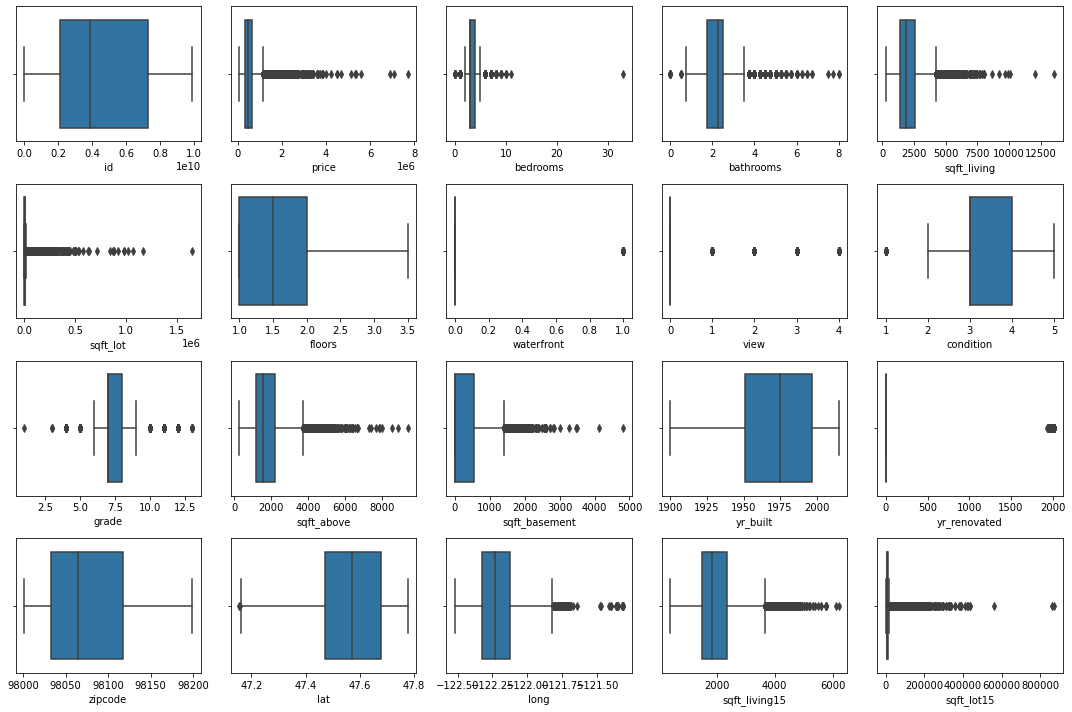

In [6]:
plt.figure(figsize=(15,10))
for i, col in enumerate(num_col):
    plt.subplot(4,5,i+1)
    sns.boxplot(df[col])
    plt.tight_layout()

In [56]:
dataDesc = []

for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isnull().sum(),
        round((((df[i].isnull().sum()) / (len(df))) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [57]:
pd.DataFrame(dataDesc, columns=[
    'Data Features',
    'Data Types',
    'Null',
    'Null Percentage',
    'Unique',
    'Unique Sample'
] )

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,id,int64,0,0.0,21436,"[1136100006, 984220290]"
1,date,object,0,0.0,372,"[20141130T000000, 20140511T000000]"
2,price,float64,0,0.0,4028,"[475226.0, 768000.0]"
3,bedrooms,int64,0,0.0,13,"[8, 10]"
4,bathrooms,float64,0,0.0,30,"[1.75, 2.5]"
5,sqft_living,int64,0,0.0,1038,"[1275, 5160]"
6,sqft_lot,int64,0,0.0,9782,"[6977, 12130]"
7,floors,float64,0,0.0,6,"[3.0, 1.0]"
8,waterfront,int64,0,0.0,2,"[1, 0]"
9,view,int64,0,0.0,5,"[4, 0]"


In [181]:
# Change type date from Object to datetime
df['date'] = df['date'].astype('datetime64')
df['date'].dtypes

dtype('<M8[ns]')

In [182]:
# Change type zipcode from int64 to str to one hot encoding
df['zipcode'] = df['zipcode'].astype('str')
df['zipcode'].dtypes

dtype('O')

In [183]:
#Proses ekstrasi Date
sale_dt = df['date'].dt
df['year'] = sale_dt.year

### Data Preparation

`Check Correlation`

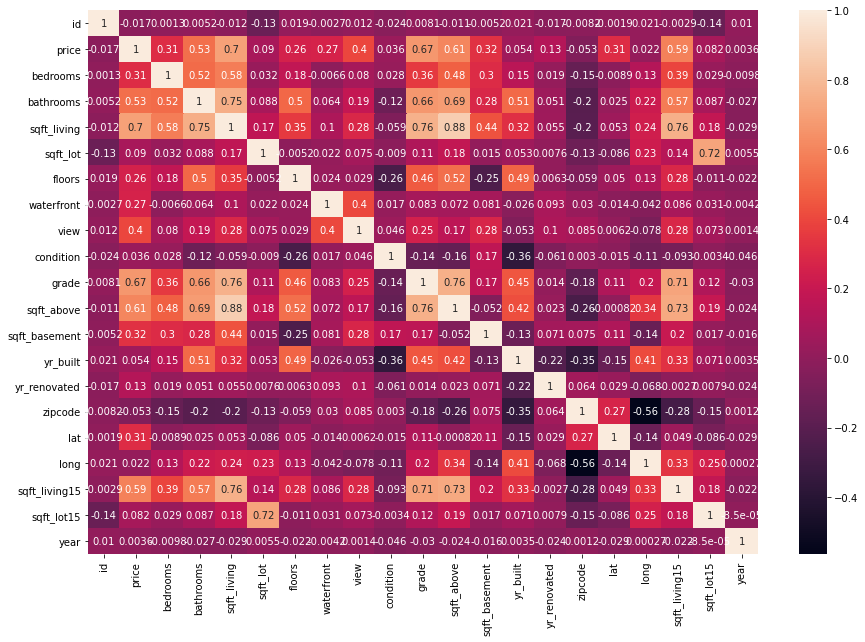

In [60]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [64]:
# df.head()
# bedrooms, bathrooms, sqft_living, floors, waterfront, view, grade, sqft_basemant, lat, sqft_living15

In [184]:
## adding features 1
df['age_house'] = df['year'] - df['yr_built']

In [185]:
## adding features 2
df['ageRenovated'] = df['year'] - df['yr_renovated']
def ageRenovated(x):
    if x == 2014 or x == 2015:
        return 0
    else:
        return x
df['ageRenovated'] = df['ageRenovated'].apply(ageRenovated)

In [186]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,age_house,ageRenovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,59,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63,23
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,82,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,49,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,28,0


In [191]:
# List of Categorical and Numerical Features after some change of type
char_col = []
num_col = []
for col in df.columns:
    if df[col].dtypes == 'int64' or df[col].dtypes == 'float64':
        num_col.append(col)
    else :
        char_col.append(col)
print('String columns ({}) : {}'.format(len(char_col), char_col))
print('-'*50)
print('Numerical columns ({}): {}'.format(len(num_col), num_col))

String columns (2) : ['date', 'zipcode']
--------------------------------------------------
Numerical columns (22): ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'age_house', 'ageRenovated']


In [192]:
### Feature Selection & Feature Engineering  
df.drop(columns=['id', 'date', 'long', 'sqft_above', 'yr_built', 'yr_renovated', 'year', 'grade'], inplace=True )

#Reason for dropping the columns:
# id, date : this features has weak regarding to the price
# long : has weak correlation with price
# sqft_above : since sqft_above and sqft_living has high correlation (0.88) so I prefer to use just one of the and dropping another one
# yr_built, yr_renovated, year : dropping this features because its already replace with additional feature
# grade : I think that condition and grade has similarity to show the condition of the house, so I prefer to use one of them

In [193]:
# Scalling
df_scale = df.copy()
df_scale.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,zipcode,lat,sqft_living15,sqft_lot15,age_house,ageRenovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,0,98178,47.5112,1340,5650,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,400,98125,47.7210,1690,7639,63,23
2,180000.0,2,1.00,770,10000,1.0,0,0,3,0,98028,47.7379,2720,8062,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,910,98136,47.5208,1360,5000,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,0,98074,47.6168,1800,7503,28,0


In [ ]:
## Robust Scaller

In [194]:
from sklearn.preprocessing import RobustScaler

In [195]:
x_scale=df_scale.drop(columns=['price', 'zipcode'])
y_scale=df_scale['price']

In [197]:
x_scale.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_basement', 'lat',
       'sqft_living15', 'sqft_lot15', 'age_house', 'ageRenovated'],
      dtype='object')

In [196]:
scaling = RobustScaler()

In [198]:
df_scaled = pd.DataFrame(scaling.fit_transform(x_scale), columns=x_scale.columns)
df_scaled.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,lat,sqft_living15,sqft_lot15,age_house,ageRenovated
0,0.0,-1.666667,-0.650045,-0.348442,-0.5,0.0,0.0,0.0,0.000000,-0.292754,-0.574713,-0.395344,0.422222,0.0
1,0.0,0.000000,0.587711,-0.066572,0.5,0.0,0.0,0.0,0.714286,0.720773,-0.172414,0.003813,0.511111,23.0
2,-1.0,-1.666667,-1.015138,0.421742,-0.5,0.0,0.0,0.0,0.000000,0.802415,1.011494,0.088702,0.933333,0.0
3,1.0,1.000000,0.044524,-0.463527,-0.5,0.0,0.0,2.0,1.625000,-0.246377,-0.551724,-0.525788,0.200000,0.0
4,0.0,-0.333333,-0.204809,0.081799,-0.5,0.0,0.0,0.0,0.000000,0.217391,-0.045977,-0.023480,-0.266667,0.0


In [201]:
#New data frame for price and zipcode
df_zip_price = df[['price', 'zipcode']]
df_zip_price.head()

,price,zipcode
0,221900.0,98178
1,538000.0,98125
2,180000.0,98028
3,604000.0,98136
4,510000.0,98074


In [204]:
#One Hot Encoding
df_zip_price = pd.get_dummies(data =df_zip_price, columns=['zipcode'], prefix_sep='_')

In [206]:
## Getting All Data
df_all = pd.concat([df_scaled, df_zip_price], axis=1)
df_all.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,lat,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.0,-1.666667,-0.650045,-0.348442,-0.5,0.0,0.0,0.0,0.000000,-0.292754,...,0,0,0,0,0,0,1,0,0,0
1,0.0,0.000000,0.587711,-0.066572,0.5,0.0,0.0,0.0,0.714286,0.720773,...,0,0,0,0,0,0,0,0,0,0
2,-1.0,-1.666667,-1.015138,0.421742,-0.5,0.0,0.0,0.0,0.000000,0.802415,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1.000000,0.044524,-0.463527,-0.5,0.0,0.0,2.0,1.625000,-0.246377,...,0,0,0,0,0,0,0,0,0,0
4,0.0,-0.333333,-0.204809,0.081799,-0.5,0.0,0.0,0.0,0.000000,0.217391,...,0,0,0,0,0,0,0,0,0,0


In [248]:
# df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,zipcode,lat,sqft_living15,sqft_lot15,age_house,ageRenovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,0,98178,47.5112,1340,5650,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,400,98125,47.7210,1690,7639,63,23
2,180000.0,2,1.00,770,10000,1.0,0,0,3,0,98028,47.7379,2720,8062,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,910,98136,47.5208,1360,5000,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,0,98074,47.6168,1800,7503,28,0


### Machine Learning Modelling

In [207]:
from sklearn.model_selection import train_test_split

In [208]:
from sklearn import set_config
set_config(print_changed_only=False)

In [249]:
x = df_all.drop(columns='price')
y = df_all['price']

In [250]:
#Splitting Data
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=.80, random_state=42)

In [41]:
# x_train.head()
# y_train.head()

#### 1. Base Linear Regression

In [251]:
from sklearn.linear_model import LinearRegression

In [252]:
model_LR = LinearRegression()

In [253]:
model_LR.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [254]:
y_pred_LR = model_LR.predict(x_test)

In [255]:
pd.DataFrame(index= x_train.columns, data = model_LR.coef_, columns=['Coefficient'])

,Coefficient
bedrooms,-3.239802e+04
bathrooms,2.635770e+04
sqft_living,2.776256e+05
sqft_lot,1.560028e+03
floors,-4.373903e+04
...,...
zipcode_98177,-9.903554e+13
zipcode_98178,-9.903554e+13
zipcode_98188,-9.903554e+13
zipcode_98198,-9.903554e+13


In [36]:
### Evaluation Matrix Regression

In [256]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [257]:
### Evaluation Matrix Data Train
pred_train = model_LR.predict(x_train)

MAE_train = mean_absolute_error(y_train, pred_train)
MSE_train = mean_squared_error(y_train, pred_train)
RMSE_train = np.sqrt(MSE_train)
R2_train = r2_score(y_train, pred_train)

In [258]:
### Evaluation Matrix Data Test
MAE_test = mean_absolute_error(y_test, y_pred_LR)
MSE_test = mean_squared_error(y_test, y_pred_LR)
RMSE_test = np.sqrt(MSE_test)
R2_test = r2_score(y_test, y_pred_LR)

In [259]:
data = {
    "Training" : [MAE_train, MSE_train, RMSE_train, R2_train],
    "Linreg" : [MAE_test, MSE_test, RMSE_test, R2_test]
}
pd.DataFrame(data=data, index=['MAE', 'MSE', 'RMSE', 'R2'])

,Training,Linreg
MAE,9.836769e+04,1.020459e+05
MSE,2.624028e+10,3.066962e+10
RMSE,1.619885e+05,1.751274e+05
R2,7.991538e-01,7.971273e-01


In [99]:
# (6.536781e-01)-(6.546071e-01)

#### 2. Base Ridge Regression

In [260]:
from sklearn.linear_model import Ridge, Lasso

In [261]:
 model_Ridge = Ridge()

In [262]:
model_Ridge.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [263]:
y_pred_Ridge = model_Ridge.predict(x_test)

In [264]:
### Evaluation Matrix Data Train
pred_train_scale = model_Ridge.predict(x_train)

MAE_train_scale = mean_absolute_error(y_train_scale, pred_train_scale)
MSE_train_scale = mean_squared_error(y_train_scale, pred_train_scale)
RMSE_train_scale = np.sqrt(MSE_train_scale)
R2_train_scale = r2_score(y_train_scale, pred_train_scale)

### Evaluation Matrix Data Test
MAE_test_scale = mean_absolute_error(y_test_scale, y_pred_Ridge)
MSE_test_scale = mean_squared_error(y_test_scale, y_pred_Ridge)
RMSE_test_scale = np.sqrt(MSE_test_scale)
R2_test_scale = r2_score(y_test_scale, y_pred_Ridge)

In [265]:
data = {
    "Training" : [MAE_train_scale, MSE_train_scale, RMSE_train_scale, R2_train_scale],
    "Ridge" : [MAE_test_scale, MSE_test_scale, RMSE_test_scale, R2_test_scale]
}
pd.DataFrame(data=data, index=['MAE', 'MSE', 'RMSE', 'R2'])

,Training,Ridge
MAE,9.836361e+04,1.020385e+05
MSE,2.624663e+10,3.070645e+10
RMSE,1.620081e+05,1.752326e+05
R2,7.991051e-01,7.968837e-01


In [299]:
(7.991051e-01)-(7.968837e-01)

0.00222140000000004

#### 3. Lasso regression

In [266]:
model_Lasso = Lasso()

In [267]:
model_Lasso.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [268]:
y_pred_Lasso = model_Lasso.predict(x_test)

In [269]:
### Evaluation Matrix Data Train
pred_Lasso_scale = model_Lasso.predict(x_train)

MAE_Lasso_scale = mean_absolute_error(y_train_scale, pred_Lasso_scale)
MSE_Lasso_scale = mean_squared_error(y_train_scale, pred_Lasso_scale)
RMSE_Lasso_scale = np.sqrt(MSE_Lasso_scale)
R2_Lasso_scale = r2_score(y_train_scale, pred_Lasso_scale)

### Evaluation Matrix Data Test
MAE_test_scale_L = mean_absolute_error(y_test_scale, y_pred_Lasso)
MSE_test_scale_L = mean_squared_error(y_test_scale, y_pred_Lasso)
RMSE_test_scale_L = np.sqrt(MSE_test_scale_L)
R2_test_scale_L = r2_score(y_test_scale, y_pred_Lasso)

In [270]:
data_Lasso = {
    "Training" : [MAE_Lasso_scale, MSE_Lasso_scale, RMSE_Lasso_scale, R2_Lasso_scale],
    "Lasso" : [MAE_test_scale_L, MSE_test_scale_L, RMSE_test_scale_L, R2_test_scale_L]
}
pd.DataFrame(data=data_Lasso, index=['MAE', 'MSE', 'RMSE', 'R2'])

,Training,Lasso
MAE,9.836514e+04,1.020411e+05
MSE,2.624033e+10,3.066955e+10
RMSE,1.619887e+05,1.751272e+05
R2,7.991534e-01,7.971278e-01


#### 4. Base KNN Regressor

In [271]:
from sklearn.neighbors import KNeighborsRegressor

In [272]:
model_KNN = KNeighborsRegressor()

In [273]:
model_KNN.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [274]:
y_pred_KNN = model_Lasso.predict(x_test)

In [275]:
### Evaluation Matrix Data Train
pred_KNN_scale = model_KNN.predict(x_train)

MAE_KNN_scale = mean_absolute_error(y_train_scale, pred_KNN_scale)
MSE_KNN_scale = mean_squared_error(y_train_scale, pred_KNN_scale)
RMSE_KNN_scale = np.sqrt(MSE_KNN_scale)
R2_KNN_scale = r2_score(y_train_scale, pred_KNN_scale)

### Evaluation Matrix Data Test
MAE_test_scale_KNN = mean_absolute_error(y_test_scale, y_pred_KNN)
MSE_test_scale_KNN = mean_squared_error(y_test_scale, y_pred_KNN)
RMSE_test_scale_KNN = np.sqrt(MSE_test_scale_KNN)
R2_test_scale_KNN = r2_score(y_test_scale, y_pred_KNN)

In [276]:
data_KNN = {
    "Training" : [MAE_KNN_scale, MSE_KNN_scale, RMSE_KNN_scale, R2_KNN_scale],
    "Lasso" : [MAE_test_scale_KNN, MSE_test_scale_KNN, RMSE_test_scale_KNN, R2_test_scale_KNN]
}
pd.DataFrame(data=data_KNN, index=['MAE', 'MSE', 'RMSE', 'R2'])

,Training,Lasso
MAE,7.474561e+04,1.020411e+05
MSE,2.153833e+10,3.066955e+10
RMSE,1.467594e+05,1.751272e+05
R2,8.351431e-01,7.971278e-01


In [286]:
# (8.351431e-01)-(7.971278e-01)

#### 5. Base Random Forest

In [279]:
from sklearn.ensemble import RandomForestRegressor

In [280]:
model_RF = RandomForestRegressor()

In [281]:
model_RF.fit(x_train,y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [282]:
y_pred_RF = model_RF.predict(x_test)

In [283]:
### Evaluation Matrix Data Train
pred_RF = model_RF.predict(x_train)

MAE_RF = mean_absolute_error(y_train, pred_RF)
MSE_RF = mean_squared_error(y_train_scale, pred_RF)
RMSE_RF = np.sqrt(MSE_RF)
R2_RF = r2_score(y_train, pred_RF)

### Evaluation Matrix Data Test
MAE_test_RF = mean_absolute_error(y_test, y_pred_RF)
MSE_test_RF = mean_squared_error(y_test, y_pred_RF)
RMSE_test_RF = np.sqrt(MSE_test_RF)
R2_test_RF = r2_score(y_test, y_pred_RF)

In [284]:
data_RF = {
    "Training" : [MAE_RF,MSE_RF, RMSE_RF, R2_RF],
    "RF" : [MAE_test_RF, MSE_test_RF, RMSE_test_RF, R2_test_RF]
}
pd.DataFrame(data=data_RF, index=['MAE', 'MSE', 'RMSE', 'R2'])

,Training,RF
MAE,2.753229e+04,7.893064e+04
MSE,2.572350e+09,2.616262e+10
RMSE,5.071834e+04,1.617486e+05
R2,9.803109e-01,8.269401e-01


In [287]:
# (9.803109e-01)-(8.269401e-01)

0.15337080000000003

### Optimasize Model - Hyper Parameter Tuning

In [288]:
from sklearn.model_selection import GridSearchCV

#### Ridge regression - HPT

In [289]:
tuned_Ridge = Ridge()

In [290]:
param_ridge = {
    'alpha' : [1.0, 0.01, 0.2, 0.1, 2.0]
}

In [291]:
model_tuned_Ridge = GridSearchCV(estimator=tuned_Ridge, param_grid=param_ridge, cv = 3, n_jobs=-1)

In [292]:
#Fit Data Train
model_tuned_Ridge.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [1.0, 0.01, 0.2, 0.1, 2.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [293]:
model_tuned_Ridge_1 = model_tuned_Ridge.best_estimator_

In [295]:
y_tuned_ridge = model_tuned_Ridge_1.predict(x_test)

In [296]:
### Evaluation Matrix Data Train
pred_train_tuned = model_tuned_Ridge_1.predict(x_train)

MAE_train_tuned = mean_absolute_error(y_train_scale, pred_train_tuned)
MSE_train_tuned = mean_squared_error(y_train_scale, pred_train_tuned)
RMSE_train_tuned = np.sqrt(MSE_train_tuned)
R2_train_tuned = r2_score(y_train_scale, pred_train_tuned)

### Evaluation Matrix Data Test
MAE_test_tuned = mean_absolute_error(y_test_scale, y_tuned_ridge)
MSE_test_tuned = mean_squared_error(y_test_scale, y_tuned_ridge)
RMSE_test_tuned = np.sqrt(MSE_test_scale)
R2_test_tuned = r2_score(y_test_scale, y_tuned_ridge)

In [297]:
data_tune = {
    "Training" : [MAE_train_tuned, MSE_train_tuned, RMSE_train_tuned, R2_train_tuned],
    "Ridge" : [MAE_test_tuned, MSE_test_tuned, RMSE_test_tuned, R2_test_tuned]
}
pd.DataFrame(data=data_tune, index=['MAE', 'MSE', 'RMSE', 'R2'])

,Training,Ridge
MAE,9.836754e+04,1.020456e+05
MSE,2.624028e+10,3.066991e+10
RMSE,1.619885e+05,1.752326e+05
R2,7.991538e-01,7.971254e-01


In [298]:
(7.991538e-01)-(7.971254e-01)

0.0020284000000000413

### Lasso - HPT

In [300]:
tuned_Lasso = Lasso()

In [301]:
param_lasso = {
    'alpha' : [1.0, 0.01, 0.2, 0.1, 2.0, 0.03]
}

In [302]:
model_tuned_Lasso = GridSearchCV(estimator=tuned_Lasso, param_grid=param_lasso, cv =5 , n_jobs=-1)

In [303]:
#Fit Data Train
model_tuned_Lasso.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [1.0, 0.01, 0.2, 0.1, 2.0, 0.03]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [305]:
model_tuned_Lasso_1 = model_tuned_Lasso.best_estimator_

In [306]:
y_tuned_lasso = model_tuned_Lasso_1.predict(x_test)

In [307]:
### Evaluation Matrix Data Train
pred_Lasso_tuned = model_tuned_Lasso_1.predict(x_train)

MAE_Lasso_tuned = mean_absolute_error(y_train_scale, pred_Lasso_tuned)
MSE_Lasso_tuned = mean_squared_error(y_train_scale, pred_Lasso_tuned)
RMSE_Lasso_tuned = np.sqrt(MSE_Lasso_tuned)
R2_Lasso_tuned = r2_score(y_train_scale, pred_Lasso_tuned)

### Evaluation Matrix Data Test
MAE_test_tuned_L = mean_absolute_error(y_test_scale, y_tuned_lasso)
MSE_test_tuned_L = mean_squared_error(y_test_scale, y_tuned_lasso)
RMSE_test_tuned_L = np.sqrt(MSE_test_tuned_L)
R2_test_tuned_L = r2_score(y_test_scale, y_tuned_lasso)

In [308]:
data_Lasso_tuned = {
    "Training" : [MAE_Lasso_tuned, MSE_Lasso_tuned, RMSE_Lasso_tuned, R2_Lasso_tuned],
    "Lasso" : [MAE_test_tuned_L, MSE_test_tuned_L, RMSE_test_tuned_L, R2_test_tuned_L]
}
pd.DataFrame(data=data_Lasso_tuned, index=['MAE', 'MSE', 'RMSE', 'R2'])

,Training,Lasso
MAE,9.836389e+04,1.020381e+05
MSE,2.624055e+10,3.066953e+10
RMSE,1.619894e+05,1.751272e+05
R2,7.991517e-01,7.971279e-01


In [309]:
(7.991517e-01)-(7.971279e-01)

0.00202380000000002